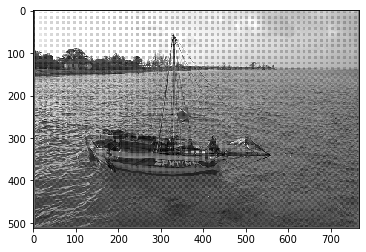

In [3]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import struct
import numpy as np
%matplotlib inline
import mpld3
mpld3.enable_notebook()

fileName = "kodim06.png.bin"

raw_file = open(fileName, "rb")

width = struct.unpack('i', raw_file.read(4))[0]
height = struct.unpack('i', raw_file.read(4))[0]

image = np.zeros(shape=(height, width))
for y in range(0, height):
    for x in range(0, width):
        image[y, x] = struct.unpack('f', raw_file.read(4))[0]
        
plt.imshow(image, cmap='gray', vmin=0, vmax=1)

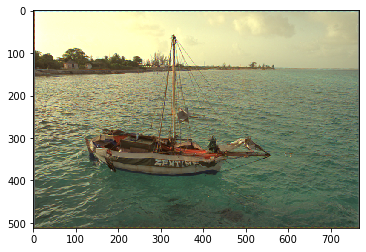

In [4]:
im_color = np.zeros(shape=(height, width, 3))

def getC(image, y, x):
    if y < 0 or x < 0:
        return 0
    shape = image.shape
    if y >= shape[0] or x >= shape[1]:
        return 0
    return image[y, x]

for y in range(0, height):
    for x in range(0, width):
        if y % 2 == 0:
            if x % 2 == 0:
                # R
                im_color[y, x, 0] = getC(image, y, x)
                im_color[y, x, 1] = (getC(image, y - 1, x) + getC(image, y + 1, x) + getC(image, y, x - 1) + getC(image, y, x + 1)) / 4
                im_color[y, x, 2] = (getC(image, y - 1, x - 1) + getC(image, y + 1, x - 1) + getC(image, y + 1, x + 1) + getC(image, y - 1, x + 1)) / 4
            else:
                # G
                im_color[y, x, 0] = (getC(image, y, x - 1) + getC(image, y, x + 1)) / 2
                im_color[y, x, 1] = getC(image, y, x)
                im_color[y, x, 2] = (getC(image, y + 1, x) + getC(image, y - 1, x)) / 2
        else:
            if x % 2 == 0:
                # G
                im_color[y, x, 0] = (getC(image, y + 1, x) + getC(image, y - 1, x)) / 2
                im_color[y, x, 1] = getC(image, y, x)
                im_color[y, x, 2] = (getC(image, y, x - 1) + getC(image, y, x + 1)) / 2
            else:
                # B
                im_color[y, x, 0] = (getC(image, y - 1, x - 1) + getC(image, y + 1, x - 1) + getC(image, y + 1, x + 1) + getC(image, y - 1, x + 1)) / 4
                im_color[y, x, 1] = (getC(image, y - 1, x) + getC(image, y + 1, x) + getC(image, y, x - 1) + getC(image, y, x + 1)) / 4
                im_color[y, x, 2] = getC(image, y, x)

plt.imshow(im_color)